## Object Identity and Type

Every piece of data store in a Python program is an object.  Each object has an identity, a type, and data values.

Most objects are characterized by a number of data <b>attributes</b> and <b>methods</b>.  An attribute is a value associated with an object while a method is a function that performs an operation on either an object (instance of a class) or the class.

## Object Identity and Type

Python provides different ways you might compare two objects.

In [3]:
#compare two objects
def compare(a,b):
    if a is b:
        print("objects {} and {} reference the same object".format(id(a), id(b)))

    if a == b:
        print("objects {} and {} have the same value".format(a,b))
        
    if type(a) is type(b):
        print("objects {} and {} are of the same class".format(a,b))
        
compare(3,3)
compare("hello", "ciao")
    

objects 2426628368752 and 2426628368752 reference the same object
objects 3 and 3 have the same value
objects 3 and 3 are of the same class
objects hello and ciao are of the same class


## References and Copies

All objects are referenc-counted.  An object's reference count is increased whenever it's assigned to a variable or placed in a container such as a list, tuple, or dictionary.

When a program makes an assignment like a=b, a new reference to the rhs (right-hand-side) object that b refers is made.  For immutable objects such as numbers and strings, this assignment effectively creates a copy of the rhs object.

Two type of copy oeprations are applied are applied to containers such as lists and dictionaries: a <b>shallow copy</b> and a <b>deep copy</b>.

A shallow copy creates a new object and populates its data fields from the original object.  This can leave multiple references to shared objects that are referenced from the original object.

In [10]:
a = [1,2,["a", "B"]]
b = list(a)
compare(a,b)
print("fields {} and {} reference the same object".format(id(a[2]),id(b[2])))

objects [1, 2, ['a', 'B']] and [1, 2, ['a', 'B']] have the same value
objects [1, 2, ['a', 'B']] and [1, 2, ['a', 'B']] are of the same class
fields 2424563687936 and 2424563687936 reference the same object


A deep copy creates a new object and recursively copies all the objects it contains.  There is no built-in operation for this, however the <b>copy.deepcopy()</b> function in the standard library can be used.

In [11]:
import copy
b = copy.deepcopy(a)
compare(a,b)
print("fields {} and {} reference different objects".format(id(a[2]),id(b[2])))

objects [1, 2, ['a', 'B']] and [1, 2, ['a', 'B']] have the same value
objects [1, 2, ['a', 'B']] and [1, 2, ['a', 'B']] are of the same class
fields 2424563687936 and 2424563646016 reference different objects


## Built-in Types for Data

There are several built-in types that are used to represent data in a program.  The Type Name column in the following table lists the names or expressions that your can use to check for that type using something like the isinstance() function.

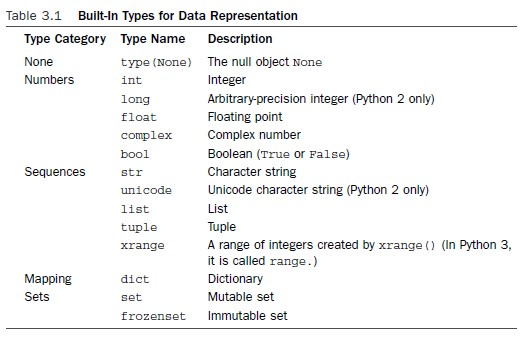

<ul>
    <li>The None Type</li>
    Denotes the exactly one null object provided by Python.  It's frequently used as the default value of an optional argument. Can be returned by a function that does not explicitly return a value.
    <li>Numeric Types</li>
    Python has five numeric types: boolean, integer numbers, long integer numbers, floating-point numbers, and complex numbers.
    <li>Sequence Types</li>
    These represent ordered set of of objects indexed by a non-negative integer, and includes strings, lists, and tuples.  Strings are sequences of characters, whereas lists and tuples are sequences of &#60;sometimes varying&#62; objects.  All sequence types are iterable.
    <li>Lists</li>
    The built-in function <b>list(w)</b> converts any iterable type to an object list.  If the argument w is an object of type  list, it creates a new list that's a shallow copy of the original object s.  See Table3-4 for the methods supported by the class list.
    <li>Strings</li>
    Python provides two string object type; the byte string, otherwise known as ASCII, and the 16-bit integer used to represent unicode characters.  Strings support methods shown in Table 3.5
    <li>Mapping Types,</li>
    A mapping object represents an arbitrary collection of objects that are indexed by another collection of arbitrary key values.  Unlike a sequence, a mapping object is unordered and can be indexed by numbers, strings, and any other types.  Mappings are mutable.  This data structure is Python's version of a hash table and an associative array.     
    The <b>dictionary</b> is the only built-in mapping type.  Table 3-6 lists the operations supported by the dictionary.
    <li>Set Types</li>
    A <b>set</b> is an unordered collection of unique items that provide no indexing or slicing operations.  The items placed in a set must be unmutable.  Two different sets are available: <I>set</I> is mutable and <I>frozenset</I> is immutable.  Both types of sets provide the methods outlines in Table 3.7.
</ul>

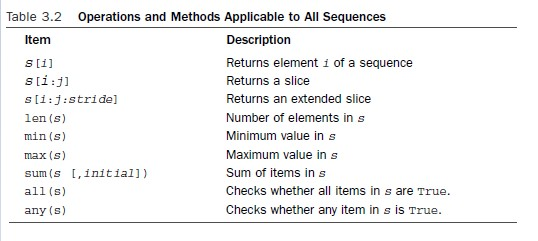

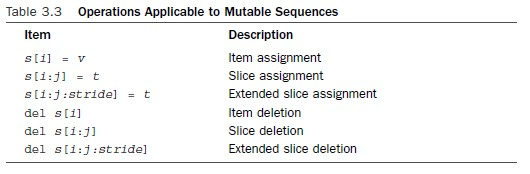

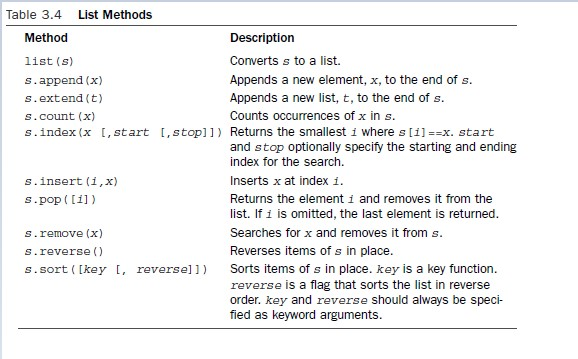

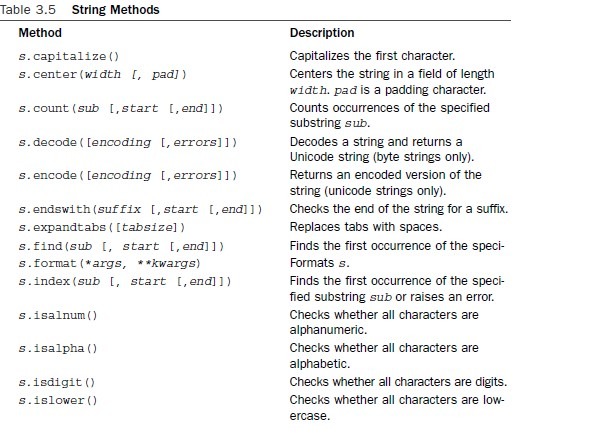

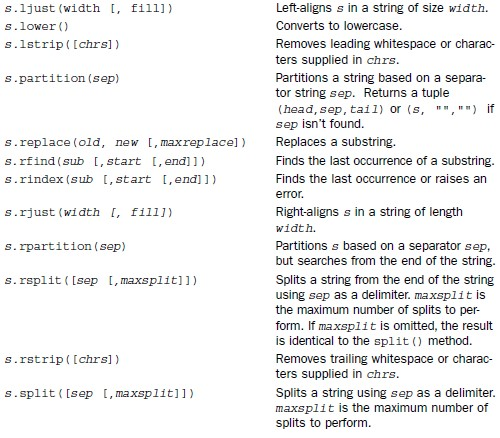

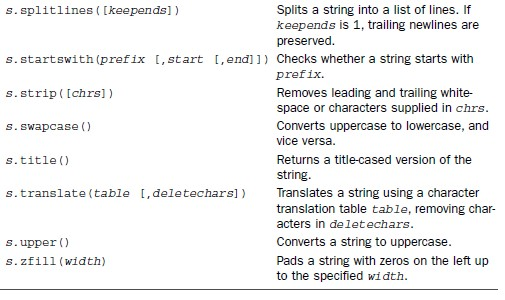

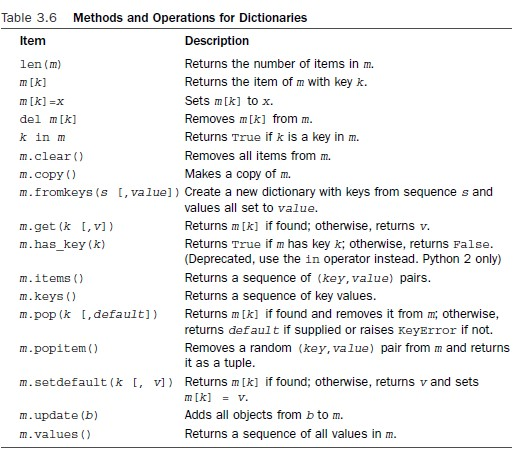

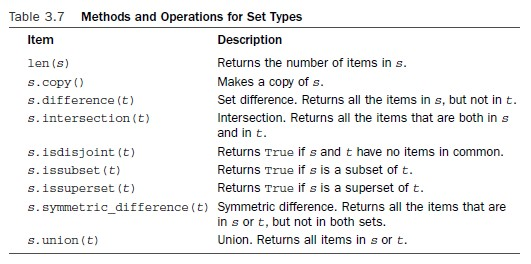

## Iteration

If a class supports iteration, it must provide a method \_\_iter__ that returns an iterator object.  The iterator object must implement a single method <b>\_\_next__</b> that returns the next item stored in the object or raises a <b>StopIteration</b> to signal the end of iteration.

Both of these methods are used by the implementation of the <b>for</b> statement as well as operations that implicityly perform iterations

In [1]:
# define a list
my_list = [4, 7, 0, 3]

# get an iterator using iter()
my_iter = iter(my_list)

# iterate through it using next()

# Output: 4
#print(next(my_iter))
print(my_iter.__next__())
print(my_iter.__next__())

# Output: 7
print(next(my_iter))

# next(obj) is same as obj.__next__()

# Output: 0
print(my_iter.__next__())

# Output: 3
print(my_iter.__next__())

# This will raise error, no items left
next(my_iter)

4
7
0
3


StopIteration: 

In [15]:
class foo:
    def __init__(self, l):
        self.myData = l
    def __iter__(self):
        return fooIter(self.myData)
    def __add__(self, othr):
        sums = []
        for n in range(len(self.myData)):
            sums.append(self.myData[n] + othr.myData[n])
        return sums

    
class fooIter:   
    def __init__(self, l):
        self.data = l
        self.item = 0
    def __next__(self):   
        if self.item < len(self.data):
            self.item += 1
            return self.data[self.item - 1]
        else:
            raise StopIteration

myList = ["a", "b", "c"]
x = foo(myList)

#using a for-loop
for s in x:
    print(s)

#using list comprehension
print([s for s in x])

a
b
c
['a', 'b', 'c']


## Mathematical Operations

Special methods that a class can define to emulate mathematical operations.  These operations should be evaluated according to the regular precedence rules.

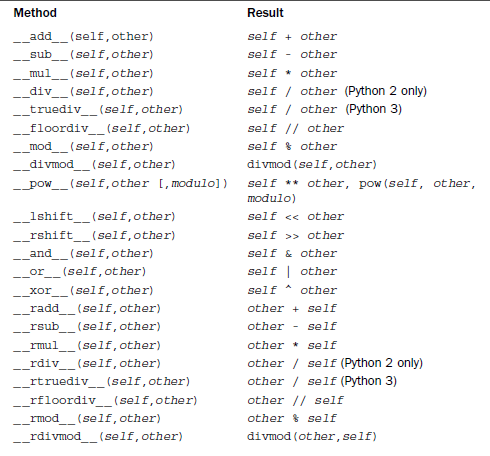

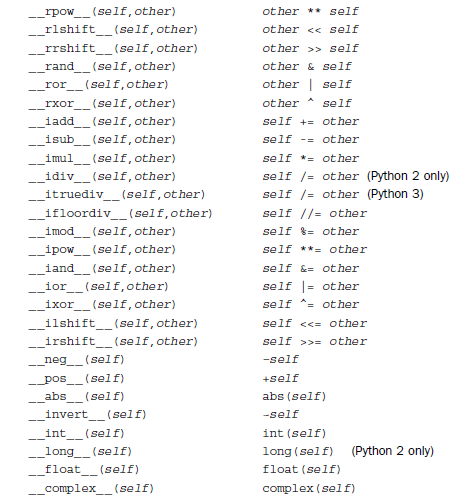

In [16]:
x = foo([1,2,3])
y = foo([5,6,7])

print(x+y)

[6, 8, 10]
